# EDA : Exploratory Data Analysis 

## <center>Climate Change Data Analysis</center>

# <div style="background-color:#ffff8f; padding:10px;">1. Problem Statement</div>

- **Data Name** -- Climate Change: Earth Surface Temperature Data
- **Source** --  Kaggle.com
- The Berkeley Earth Surface Temperature Study, compiled by Berkeley Earth and affiliated with Lawrence Berkeley National Laboratory, comprises a comprehensive amalgamation of climate data. With 1.6 billion temperature reports from 16 archives, the complexities in climate trend analysis are addressed. Accessibility and transparency are provided, enabling granular analysis like country-specific subsets, and ensuring data integrity through the open publication of both source data and applied transformations. Moreover, methodological inclusivity allows for the incorporation of weather observations from shorter time series, minimizing data loss and enhancing the depth of insights into climate trends.
- This EDA aims to illustrate the global warming and temperature trends on Earth.
<center><br><br>
<img src="https://img.freepik.com/premium-photo/planet-earth-melting-isolated-white-background-global-warming-concept-3d-illustration_339569-791.jpg" width=55%  >
</center>



# <div style="background-color:#ffff8f; padding:10px;">2. Import Libraries</div>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import scipy
from scipy.stats import spearmanr
import statistics
from datetime import timedelta
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.simplefilter("ignore")


# <div style="background-color:#ffff8f; padding:10px;">3. Loading Data</div>

In [2]:
Global_Temperature = pd.read_csv('/kaggle/input/climate-change-earth-surface-temperature-data/GlobalTemperatures.csv')
Temperature_Country = pd.read_csv('/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByCountry.csv')
Temperature_City = pd.read_csv('/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByCity.csv')

In [3]:
Global_Temperature.sample(5)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
1758,1896-07-01,14.233,0.328,19.886,0.413,8.087,0.321,16.866,0.151
2826,1985-07-01,13.973,0.087,19.711,0.113,8.362,0.141,16.906,0.051
1021,1835-02-01,2.967,1.464,NaN,NaN,NaN,NaN,NaN,NaN
2821,1985-02-01,2.704,0.085,8.322,0.117,-2.853,0.080,13.731,0.051
696,1808-01-01,1.131,4.111,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
Temperature_Country.sample(5)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
99039,1917-05-01,0.487,0.797,Canada
197423,1912-12-01,11.301,0.321,Gaza Strip
541688,1894-12-01,22.896,1.399,Uganda
91894,1913-07-01,25.581,0.388,Côte D'Ivoire
203395,1906-10-01,9.808,0.266,Germany


In [5]:
Temperature_City.sample(5)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
4590684,1957-02-01,4.247,0.206,Manchester,United Kingdom,53.84N,1.36W
7152176,1932-01-01,22.450,0.674,Srikakulam,India,18.48N,84.51E
7428360,2008-02-01,16.729,0.248,Tando Adam,Pakistan,26.52N,68.06E
3594881,1979-06-01,22.182,0.300,Kamagaya,Japan,36.17N,139.23E
3878541,1851-11-01,-1.347,1.249,Kitchener,Canada,44.20N,80.50W


# <div style="background-color: #ffff8f; padding:10px;">4. Data Description</div>
---

<br>

|Dataset| Records | Features | Dataset Size |
| :--: | :--: | :--: | :--: |
| GlobalTemperatures| 3192 | 9 | 202 KB |
| GlobalLandTemperaturesByCountry| 577462 | 4 | 21 MB |
| GlobalLandTemperaturesByCity| 8599212 | 7 | 508 MB |

<br>

- The dataset consists of the following features:

<br>

|ID|Feature name|Feature description|
|:--|:--|:--|
|1|**dt** |Year/Month/Day|
|2|**LandAverageTemperature** |Global average land temperature in celsius |
|3|**LandAverageTemperatureUncertainty** | The 95% confidence interval around the average |
|4|**LandMaxTemperature** |Global average maximum land temperature in celsius  |
|5|**LandMaxTemperatureUncertainty** |The 95% confidence interval around the maximum land temperature |
|6|**LandMinTemperature** |Global average minimum land temperature in celsius |
|7|**LandMinTemperatureUncertainty** |The 95% confidence interval around the minimum land temperature  |
|8|**LandAndOceanAverageTemperature** |Global average land and ocean temperature in celsius |
|9|**LandAndOceanAverageTemperatureUncertainty** |The 95% confidence interval around the global average land and ocean temperature |
|10|**AverageTemperature** |Average Temperature by Country or City|
|11|**Country** |Country Name|
|12|**City** |City Name|
|13|**Latitude** |Latitude of the Country or City |
|14|**Longitude** |Longitude of the Country or City|

<br>



In [6]:
print("Global_Temperature size -->",Global_Temperature.shape)
print("Temperature_Country size -->",Temperature_Country.shape)
print("Temperature_City size -->",Temperature_City.shape)

Global_Temperature size --> (3192, 9)
Temperature_Country size --> (577462, 4)
Temperature_City size --> (8599212, 7)


In [7]:
print("Feature of the Global_Temperature ---> \n\n" ,Global_Temperature.columns.tolist() , "\n")
print("Feature of the Temperature_Country ---> \n\n" ,Temperature_Country.columns.tolist() , "\n")
print("Feature of the Temperature_City ---> \n\n" ,Temperature_City.columns.tolist())

Feature of the Global_Temperature ---> 

 ['dt', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty', 'LandMaxTemperature', 'LandMaxTemperatureUncertainty', 'LandMinTemperature', 'LandMinTemperatureUncertainty', 'LandAndOceanAverageTemperature', 'LandAndOceanAverageTemperatureUncertainty'] 

Feature of the Temperature_Country ---> 

 ['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'Country'] 

Feature of the Temperature_City ---> 

 ['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'City', 'Country', 'Latitude', 'Longitude']


In [8]:
Global_Temperature.describe()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
count,3180.000000,3180.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,8.374731,0.938468,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
std,4.381310,1.096440,4.309579,0.583203,4.155835,0.445838,1.274093,0.073587
min,-2.080000,0.034000,5.900000,0.044000,-5.407000,0.045000,12.475000,0.042000
25%,4.312000,0.186750,10.212000,0.142000,-1.334500,0.155000,14.047000,0.063000
50%,8.610500,0.392000,14.760000,0.252000,2.949500,0.279000,15.251000,0.122000
75%,12.548250,1.419250,18.451500,0.539000,6.778750,0.458250,16.396250,0.151000
max,19.021000,7.880000,21.320000,4.373000,9.715000,3.498000,17.611000,0.457000


In [9]:
Global_Temperature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB


In [10]:
Global_Temperature.isna().sum()

dt                                              0
LandAverageTemperature                         12
LandAverageTemperatureUncertainty              12
LandMaxTemperature                           1200
LandMaxTemperatureUncertainty                1200
LandMinTemperature                           1200
LandMinTemperatureUncertainty                1200
LandAndOceanAverageTemperature               1200
LandAndOceanAverageTemperatureUncertainty    1200
dtype: int64

In [11]:
Temperature_Country.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,544811.000000,545550.000000
mean,17.193354,1.019057
std,10.953966,1.201930
min,-37.658000,0.052000
25%,10.025000,0.323000
50%,20.901000,0.571000
75%,25.814000,1.206000
max,38.842000,15.003000


In [12]:
Temperature_Country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


In [13]:
Temperature_Country.isna().sum()

dt                                   0
AverageTemperature               32651
AverageTemperatureUncertainty    31912
Country                              0
dtype: int64

In [14]:
Temperature_City.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,8.235082e+06,8.235082e+06
mean,1.672743e+01,1.028575e+00
std,1.035344e+01,1.129733e+00
min,-4.270400e+01,3.400000e-02
25%,1.029900e+01,3.370000e-01
50%,1.883100e+01,5.910000e-01
75%,2.521000e+01,1.349000e+00
max,3.965100e+01,1.539600e+01


In [15]:
Temperature_City.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   dt                             object 
 1   AverageTemperature             float64
 2   AverageTemperatureUncertainty  float64
 3   City                           object 
 4   Country                        object 
 5   Latitude                       object 
 6   Longitude                      object 
dtypes: float64(2), object(5)
memory usage: 459.2+ MB


In [16]:
Temperature_City.isna().sum()

dt                                    0
AverageTemperature               364130
AverageTemperatureUncertainty    364130
City                                  0
Country                               0
Latitude                              0
Longitude                             0
dtype: int64


#### **Observations:**
##### **Global_Temperature Data** :
- The data set contains **3192** records with **9** features.

- There are **1 object data type** and **8 float64 data type** features.
 
- Total **7224 null values** are present in the data. 1200 each for LandMaxTemperature , La,ndMaxTemperatureUncertainty,LandMinTemperature , LandMinTemperatureUncertainty, LandAndOceanAverageTemperature , LandAndOceanAverageTemperatureUncertainty columns respectively.
Null values in the min or max column are typical since, among 365-day rows for each year, only one usually contains the specific year's min or max value, leaving other rows blank in that year for only min or max related column.

##### **Temperature_Country Data** :
- The data set contains **577462** records with **4** features.

- There are **2 object data type** and **2 float64 data type** features.
 
- Total **64563 null values** are present in the data . AverageTemperature column contains 32651 null values and rest belongs to AverageTemperatureUncertainty column.

##### **Temperature_City Data** :
- The data set contains **8599212** records with **7** features.

- There are **5 object data type** and **2 float64 data type** features.
 
- Total **728260 null values** are present in the data . Evenly distributed between the AverageTemperature and AverageTemperatureUncertainty columns.


# <div style="background-color:#ffff8f; padding:10px;">5. Data Cleaning</div>

##### **The analysis will rely on average values, and nulls cannot be substituted, as certain countries or cities lack any data in the average temperature column. Therefore, null rows in the average temperature column will be dropped.**

In [17]:
Temperature_City.dropna(axis= 0 , subset= ['AverageTemperature'] , inplace= True)
Temperature_Country.dropna(axis= 0 , subset=  ['AverageTemperature'] , inplace= True)

##### **Adding Year Column**

In [18]:
Global_Temperature['Year'] = pd.to_datetime(Global_Temperature['dt']).dt.year
Temperature_City['Year'] = pd.to_datetime(Temperature_City['dt']).dt.year
Temperature_Country['Year'] = pd.to_datetime(Temperature_Country['dt']).dt.year

##### **Adding Month Column**

In [19]:
Global_Temperature['Month'] = pd.to_datetime(Global_Temperature['dt']).dt.month
Temperature_City['Month'] = pd.to_datetime(Temperature_City['dt']).dt.month
Temperature_Country['Month'] = pd.to_datetime(Temperature_Country['dt']).dt.month

##### **Adding Season Column**

In [20]:
def season_name(month_number):
    seasons = {
        1: 'Winter',
        2: 'Winter',
        3: 'Spring',
        4: 'Spring',
        5: 'Spring',
        6: 'Summer',
        7: 'Summer',
        8: 'Summer',
        9: 'Autumn',
        10: 'Autumn',
        11: 'Autumn',
        12: 'Winter'
    }
    return seasons.get(month_number)
Global_Temperature['Season'] = Global_Temperature['Month'].apply(season_name)


#####  **Adding Month Name Column**

In [21]:
def get_month_name(month_number):
    months = {
        1: 'January',
        2: 'February',
        3: 'March',
        4: 'April',
        5: 'May',
        6: 'June',
        7: 'July',
        8: 'August',
        9: 'September',
        10: 'October',
        11: 'November',
        12: 'December'
    }
    return months.get(month_number)

Global_Temperature['Month_Name'] = Global_Temperature['Month'].apply(get_month_name)


##### **Adding Century Column**

In [22]:
def get_century(year):
    century = (year - 1) // 100 + 1
    return century

Global_Temperature['Century'] = Global_Temperature['Year'].apply(get_century)
Temperature_City['Century'] = Temperature_City['Year'].apply(get_century)
Temperature_Country['Century'] = Temperature_Country['Year'].apply(get_century)


##### **Adding average Ocean Temperature column by subtracting LandAverageTemperature from LandAndOceanAverageTemperature**

In [23]:
Global_Temperature['OceanAverageTemperature'] = Global_Temperature['LandAndOceanAverageTemperature'] - Global_Temperature['LandAverageTemperature']

##### **Adding the coordinate values of Latitude and Longitude** 

In [24]:
def lat_cor(x):
    if x[-1] == 'N' : 
        return float(x[:-1])
    elif x[-1] == 'S' :
        return float("-" + x[:-1])
    else :
        return none    
Temperature_City['Lat_Cor'] = Temperature_City['Latitude'].apply(lat_cor)

def lon_cor(x):
    if x[-1] == 'E':
        return float(x[:-1])
    elif x[-1] == 'W':
        return -float(x[:-1])
    else:
        return None  
Temperature_City['Lon_Cor'] = Temperature_City['Longitude'].apply(lon_cor)

# <div style="background-color:#ffff8f; padding:10px;">6. Exploratory Data Analysis</div>

#### <div style="background-color:#c6fcc7 ; padding:10px;">**Temperature trend analysis throughout the 250 years :--**


In [25]:
fig = px.line(data_frame= Global_Temperature.groupby(['Year' , 'Month'])[['LandAverageTemperature','LandAverageTemperatureUncertainty']].mean().reset_index() 
        , x = 'Year' , y = ['LandAverageTemperature','LandAverageTemperatureUncertainty'] ,
        title = 'Average Land Temperature and Average land Temperature Uncertainity trend over the years : -- ')
fig.update_layout(yaxis = dict(title_text = 'Temperature'), height = 500 ,width = 950)
fig.show()




<div style="background-color:lightblue; padding:10px;"> <ul><li>The line graph displays the trends of Average Land Temperature and Average Land Temperature Uncertainty between 1750 and 2015.</li>
<li>The highest Land Average Temperature was recorded in 1761, reaching 19 degrees Celsius, while the lowest temperature was noted in 1768 at -2.18 degrees Celsius.</li>
<li>Moreover, there is a notable decrease observed in the Average Land Temperature Uncertainty values over time. This decline suggests improved accuracy or reduced variability in temperature measurements throughout the duration.</li></ul></div>

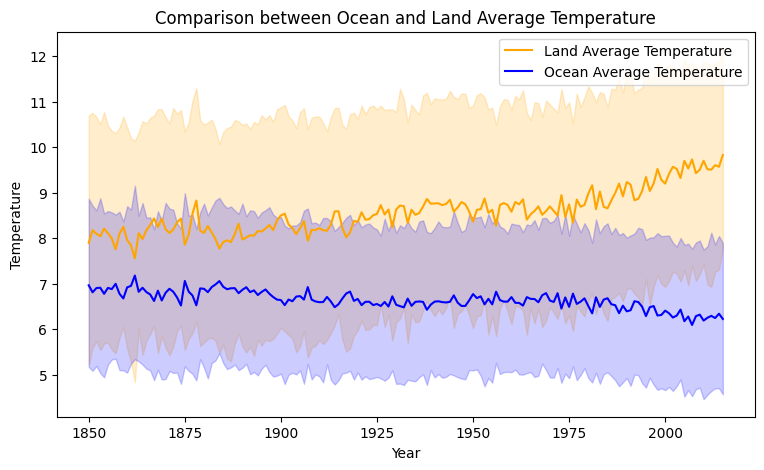

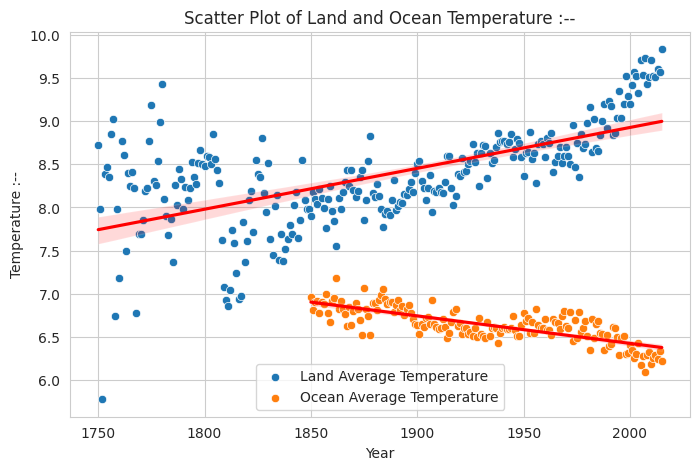

In [26]:
plt.figure(figsize=(9,5))
sns.lineplot(data=Global_Temperature.dropna(subset='OceanAverageTemperature'), y='LandAverageTemperature', x='Year', label='Land Average Temperature',color = 'orange')

sns.lineplot(data=Global_Temperature.dropna(subset='OceanAverageTemperature'), y='OceanAverageTemperature', x='Year', label='Ocean Average Temperature' , color = 'blue')

plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Comparison between Ocean and Land Average Temperature')

plt.legend()
sns.set_style("whitegrid")
plt.show()
plt.figure(figsize=(8,5))
data_to_plot = Global_Temperature.groupby('Year')[['LandAverageTemperature' , 'OceanAverageTemperature']].mean().reset_index()
sns.scatterplot(data=data_to_plot, x='Year', y='LandAverageTemperature', label='Land Average Temperature')
sns.scatterplot(data=data_to_plot, x='Year', y='OceanAverageTemperature', label='Ocean Average Temperature')
sns.regplot(data=data_to_plot, x='Year', y='LandAverageTemperature'  , scatter=False, color='red') 
sns.regplot(data=data_to_plot, x='Year', y='OceanAverageTemperature'  , scatter=False, color='red') 
plt.ylabel("Temperature :--")
plt.title('Scatter Plot of Land and Ocean Temperature :--')
plt.show()


<div style="background-color:lightblue; padding:10px;">The Land Temperature over the past 250 years exhibits an upward, increasing trend. In contrast, Ocean temperatures in the last 150 years reveal a distinct decreasing trend.</div>

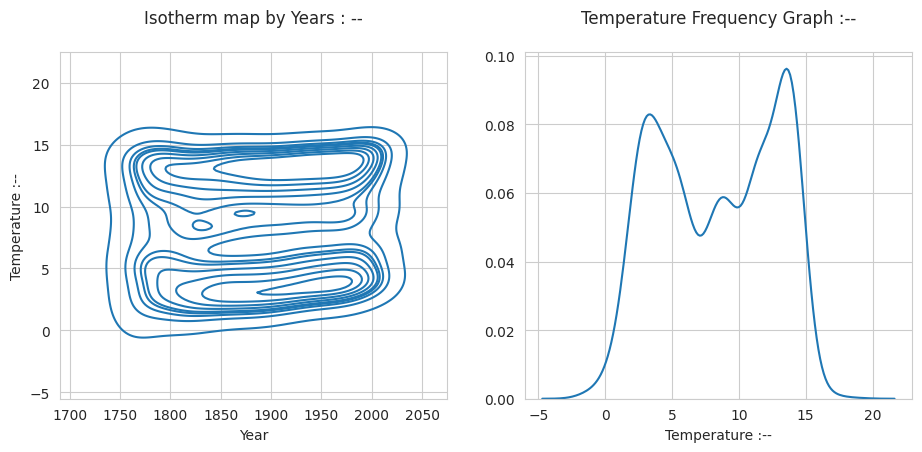

In [27]:
plt.figure(figsize=(11,4.5))
plt.subplot(1,2,1)
sns.kdeplot(data= Global_Temperature , x = 'Year' , y = 'LandAverageTemperature')
plt.ylabel("Temperature :--")
plt.title("Isotherm map by Years : --\n")

plt.subplot(1,2,2)
sns.kdeplot(data = Global_Temperature , x  = 'LandAverageTemperature' , )
plt.xlabel("Temperature :--")
plt.ylabel('')
plt.title('Temperature Frequency Graph :--\n')

sns.set_style("whitegrid")
plt.show()

<div style="background-color:lightblue; padding:10px;"> <ul><li> The Isotherm map exhibits concentrated lines around 15 degrees Celsius, with additional clustering occurring between 0 to 5 degrees Celsius.</li>
<li>In the Temperature Frequency Graph, the median temperature registers at 15 degrees Celsius, while the second-highest frequency is observed between 0 to 5 degrees Celsius.</li>
<li>Collectively, both graphs suggest that the longest-running season corresponds to summer, characterized by temperatures hovering around 15 degrees Celsius. This is followed by winter, marked by temperatures ranging between 0 to 5 degrees Celsius.</li> </ul></div>

#### <div style="background-color:#c6fcc7 ; padding:10px;">**Temperature's Correlation with Latitude and Longitude :--**


In [28]:
fig = px.choropleth(Temperature_Country.loc[Temperature_Country['Year'] == 2013 , : ].groupby('Country')['AverageTemperature'].mean().reset_index(),
                    locations='Country', height = 500 , width = 850,
                    locationmode='country names', title= 'Average Temperatute in 2013 by Countries : -- ',
                    color='AverageTemperature',
                    hover_name='Country',
                    color_continuous_scale='RdBu_r')
fig.update_layout(title_x = 0.5)
fig.show()

<div style="background-color:lightblue; padding:10px;"><ul><li>In 2013, all southern countries of North America, Africa, Oceania, Middle East Asia, South Asia, Southeast Asia, and some parts of Central Asia showcased notably higher average temperatures </li><li>Noticeabel thing is that the entire southern hemisphere displayed average temperatures higher than the global average, whereas the Northern hemisphere exhibited comparatively lower average temperatures.</li> </ul></div>



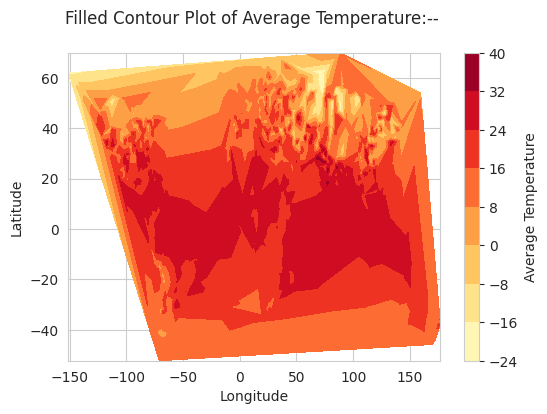

In [29]:
plt.figure(figsize=[6, 4])
contour = plt.tricontourf(Temperature_City['Lon_Cor'], Temperature_City['Lat_Cor'], Temperature_City['AverageTemperature'], cmap='YlOrRd')
plt.colorbar(contour, label='Average Temperature')
plt.title('Filled Contour Plot of Average Temperature:-- \n')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


<div style="background-color:lightblue; padding:10px;"> <ul><li> Temperature peaks between 20 degrees north and 20 degrees south, spanning from 150 degrees east to 70 degrees west. Beyond these latitudes, temperatures gradually decrease.</li>
<li> Furthermore, temperature starts declining past the 20-degree marks in both the northern and southern hemispheres.</li>
<li>The regions experiencing lower temperatures are situated approximately between 40 to 60 degrees north latitude and around 50 degrees east longitude.</li></ul></div>

#### <div style="background-color:#c6fcc7 ; padding:10px;">**Temperature trend analysis throughout Centuries :--**


In [30]:
fig = px.box(Global_Temperature, y='LandAverageTemperature', x='Century', color='Century', orientation='v' )

fig.update_layout( title='Vertical Box Plot of Land Average Temperature by Century :--',
    xaxis_title='Land Average Temperature', yaxis_title='Century' , title_x = 0.5)

fig.show()


<div style="background-color:lightblue; padding:10px;"> <ul><li>The box plot of 18th century displays the widest temperature distribution among the 250 years analyzed. Interestingly, within this period, both the coldest day and the hottest hour were recorded.</li>
<li> Across the centuries, a noticeable trend emerges, showing a decrease in temperature distribution range. The 21st century stands out with the most compact temperature distribution.</li>
<li> Moreover, the median average temperature shows an increase over the centuries, with increments of approximately −0.557%, 8.866%, and 10.541% for the 19th, 20th, and 21st centuries, respectively.</li></ul></div>

#### <div style="background-color:#c6fcc7 ; padding:10px;">**Temperature Trend Analysis by Seasons:--**


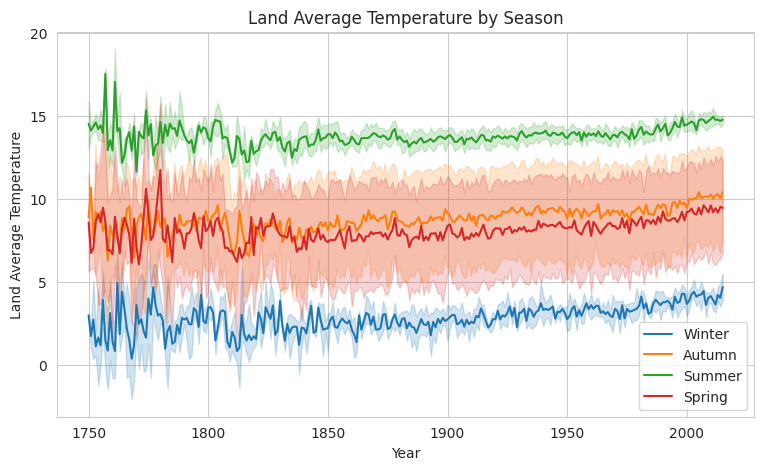

In [31]:
plt.figure(figsize=(9, 5))

sns.lineplot(data=Global_Temperature[Global_Temperature['Season'] == 'Winter'], x='Year', y='LandAverageTemperature', markers=True, label='Winter')
sns.lineplot(data=Global_Temperature[Global_Temperature['Season'] == 'Autumn'], x='Year', y='LandAverageTemperature', markers=True, label='Autumn')
sns.lineplot(data=Global_Temperature[Global_Temperature['Season'] == 'Summer'], x='Year', y='LandAverageTemperature', markers=True, label='Summer')
sns.lineplot(data=Global_Temperature[Global_Temperature['Season'] == 'Spring'], x='Year', y='LandAverageTemperature', markers=True, label='Spring')

plt.xlabel('Year')
plt.ylabel('Land Average Temperature')
plt.title('Land Average Temperature by Season')

plt.legend()
sns.set_style("whitegrid")
plt.show()



<div style="background-color:lightblue; padding:10px;"> <ul><li> Over the course of 250 years, the summer season consistently demonstrates the highest temperature trends, typically ranging between 12 to 19 degrees Celsius. Following this, both Autumn and Spring exhibit temperature trends within the range of 8 to 11 degrees Celsius. Conversely, the winter season consistently displays the lowest temperature trends, ranging between 0 to 5 degrees Celsius.</li>
<li> Across the span of 250 years, all seasons exhibit a consistent upward trend in temperature.</li></ul></div>
    

#### <div style="background-color:#c6fcc7 ; padding:10px;">**Temperature Trend Analysis by Months :--**


In [32]:
fig = px.box(Global_Temperature, y='LandAverageTemperature', x='Month_Name', color='Month_Name', orientation='v' )

fig.update_layout( title='Vertical Box Plot of Land Average Temperature by Months :--',height = 600,width = 900,
    xaxis_title='Land Average Temperature', yaxis_title='Century' , title_x = 0.5)

fig.show()

fig = px.line(data_frame= Global_Temperature , x = 'Year' , y ='LandAverageTemperature' , color= 'Month_Name')
fig.update_layout(height = 500 , width = 800 , yaxis_title = "Average Temperature")
fig.show()

<div style="background-color:lightblue; padding:10px;"> <ul><li>  July consistently records the highest average temperature among all months over the 250-year period.</li>
<li>Conversely, January consistently showcases the lowest average temperature during this duration.</li>
<li>Additionally, an upward trend is observable across all months throughout these 250 years.</li> </ul></div>

#### <div style="background-color:#c6fcc7 ; padding:10px;">**Highest and Lowest Temperatured Cities and Countries and their Trend :--**


In [33]:
print('Top 5 Countries by Average Temperature in 21st century :--')
Temperature_Country.loc[Temperature_Country['Century'] == 21 , : ].groupby('Country')['AverageTemperature'].mean().reset_index().sort_values('AverageTemperature', ascending = False).head(5)                                                                                                                                             

                                                                                                                                                     
                                                                                                                                                                                                                                                                  

Top 5 Countries by Average Temperature in 21st century :--


,Country,AverageTemperature
59,Djibouti,29.764500
134,Mali,29.358664
228,United Arab Emirates,29.149632
33,Burkina Faso,28.963197
191,Senegal,28.846612


In [34]:
print('Bottom 5 Countries by Average Temperature in 21st century :--')
Temperature_Country.loc[Temperature_Country['Century'] == 21 , : ].groupby('Country')['AverageTemperature'].mean().reset_index().sort_values('AverageTemperature', ascending = True).head(5)                                                                                                                                             
                                                                                                                                             
                                                                                                                                                                                                                                                                     

Bottom 5 Countries by Average Temperature in 21st century :--


,Country,AverageTemperature
87,Greenland,-16.798928
57,Denmark,-16.278395
209,Svalbard And Jan Mayen,-5.639908
179,Russia,-3.901796
38,Canada,-3.479059


<div style="background-color:lightblue; padding:10px;"> <ul><li>Among the top 5 highest-temperature countries, four are situated in Africa, all located in the Southern Hemisphere.</li>
<li> Conversely, within the top 5 lowest-temperature countries, two are in North America and one in Europe, all positioned in the Northern Hemisphere</li></ul></div>




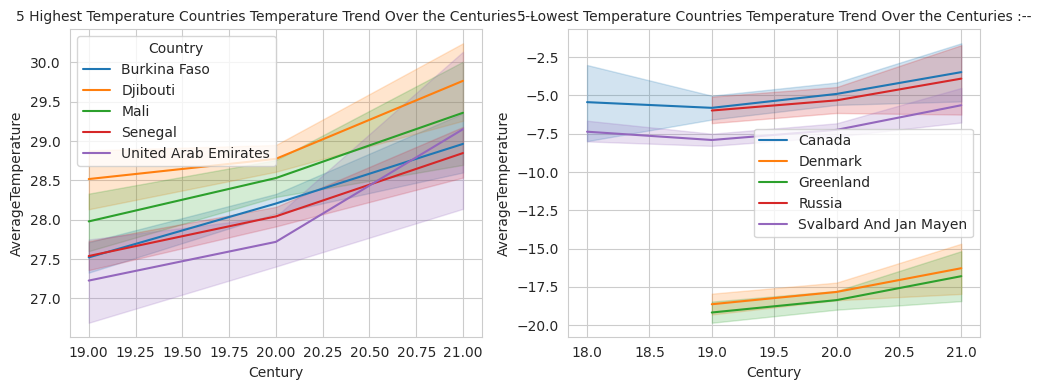

In [35]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.lineplot(data=Temperature_Country.loc[Temperature_Country['Country'].isin(['Djibouti', 'Mali', 'United Arab Emirates', 'Burkina Faso', 'Senegal']), :],
             x='Century', y='AverageTemperature', hue='Country')
plt.title('5 Highest Temperature Countries Temperature Trend Over the Centuries :--',fontdict= dict(size = 10))

plt.subplot(1, 2, 2)
sns.lineplot(data=Temperature_Country.loc[Temperature_Country['Country'].isin(['Greenland', 'Denmark', 'Svalbard And Jan Mayen', 'Russia', 'Canada']), :],
             x='Century', y='AverageTemperature', hue='Country')
plt.title('5 Lowest Temperature Countries Temperature Trend Over the Centuries :--' , fontdict= dict(size = 10))

plt.legend(loc='best')
plt.tight_layout()
plt.show()


<div style="background-color:lightblue; padding:10px;"> <ul><li>An increasing temperature trend is evident in both high-temperature and low-temperature countries, signifying the impact of global warming.</li>
<li>Additionally, the 19th Century showcases the lowest temperatures observed in 250 years across both low-temperature and high-temperature countries.</li> </ul></div>

In [36]:
print('Top 5 Countries by Average Temperature in 21st century :--')
Temperature_City.loc[Temperature_City['Century'] == 21 , : ].groupby('City')['AverageTemperature'].mean().reset_index().sort_values('AverageTemperature', ascending = False).head(5)                                                                                           



Top 5 Countries by Average Temperature in 21st century :--


,City,AverageTemperature
1376,Jibuti,30.102092
1516,Khartoum,30.010243
3159,Umm Durman,30.010243
1476,Kassala,29.877559
2106,Niamey,29.866395


In [37]:
print('Bottom 5 Countries by Average Temperature in 21st century :--')
Temperature_City.loc[Temperature_City['Century'] == 21 , : ].groupby('City')['AverageTemperature'].mean().reset_index().sort_values('AverageTemperature', ascending = True).head(5)                                                                                           



Bottom 5 Countries by Average Temperature in 21st century :--


,City,AverageTemperature
2134,Norilsk,-10.225276
1635,Kyzyl,-4.654217
615,Chita,-2.860138
3172,Ust Ilimsk,-2.500842
2080,Nefteyugansk,-2.026158


#### <div style="background-color:#c6fcc7 ; padding:10px;">**Average Land Temperature Prediction:--**


In [38]:
Temperature_Prediction = Global_Temperature[["dt" , "LandAverageTemperature"]]

Temperature_Prediction.set_index('dt', inplace=True)


model = ARIMA(Temperature_Prediction['LandAverageTemperature'], order=(2, 1, 5))  # Best fit
model_fit = model.fit()


forecast = model_fit.forecast(steps=12)  # 12 months

print("Forecast for the next 1 year:")
print(forecast)

Forecast for the next 1 year:
2016-01-01     3.953295
2016-02-01     4.321048
2016-03-01     6.078329
2016-04-01     8.772162
2016-05-01    11.610915
2016-06-01    13.834875
2016-07-01    14.850652
2016-08-01    14.389499
2016-09-01    12.578401
2016-10-01     9.905137
2016-11-01     7.086915
2016-12-01     4.877954
Freq: MS, Name: predicted_mean, dtype: float64


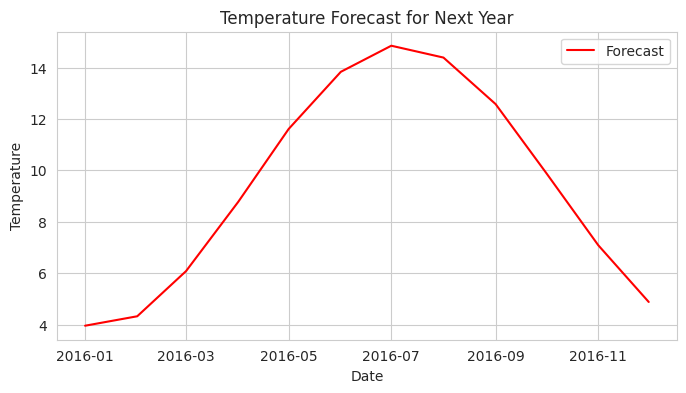

In [39]:
plt.figure(figsize=(8, 4))

plt.plot(forecast.reset_index()["index"], forecast.reset_index()['predicted_mean'], color='red', linestyle='-', label='Forecast')


plt.title('Temperature Forecast for Next Year')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)


plt.show()

# <div style="background-color:#ffff8f; padding:10px;">7. Summarization</div>

### **7.1 Conclusion :**
**Temperature Trends by Season and Month:**
- Over 250 years, summer consistently displayed the highest temperatures (12 to 19°C), followed by Autumn and Spring (8 to 11°C), while Winter consistently had the lowest temperatures (0 to 5°C).

**Centennial Temperature Trends:**
- The 18th century depicted the widest temperature distribution, marking both the coldest day and hottest hour.
- Temperature range decreased across centuries, with the 21st century displaying the most compact distribution.
- Median average temperatures increased by approximately −0.557%, 8.866%, and 10.541% for the 19th, 20th, and 21st centuries, respectively.

**Seasonal Temperature Trends:**
- A consistent upward trend was observed in temperatures across all seasons over 250 years.
- July consistently recorded the highest average temperature, while January displayed the lowest average temperature.

**Hemispheric Temperature Variations:**
- In 2013, southern regions of North America, Africa, Oceania, Middle East Asia, South Asia, Southeast Asia, and parts of Central Asia showed notably higher average temperatures. The entire southern hemisphere had temperatures higher than the global average, contrasting with relatively lower temperatures in the Northern hemisphere.
 
**Global Warming Impact:**
- The analysis revealed an increasing temperature trend in both high and low-temperature countries, indicative of the pervasive impact of global warming across diverse geographical regions. This consistent rise in temperatures underscores the overarching influence of climate change, affecting various regions and climates worldwide.

### **7.2 Actionable Insights :**
- The Temperature City and Temperature Country datasets contain over 13,000 null values that cannot be imputed due to some countries lacking any recorded data throughout the 250-year period.
- Although temperature-related data provides an opportunity to analyze the rate of global warming but the absence of climatic features like rainfall and floods restricts the comprehensive analysis of the impacts of global warming.